In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob
from keras.preprocessing import image
from sklearn.cluster import KMeans
from skimage.feature import hog
from skimage import exposure
from skimage.measure import label

#### 9.1.1 VIEW HOG FEATURE OF IMAGE

10


/Users/thana/Workspace/Class/Class_Image_Processing/env/lib/python3.8/site-packages/skimage/_shared/utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)


[0.31779671 0.         0.19975465 ... 0.14939024 0.         0.        ]


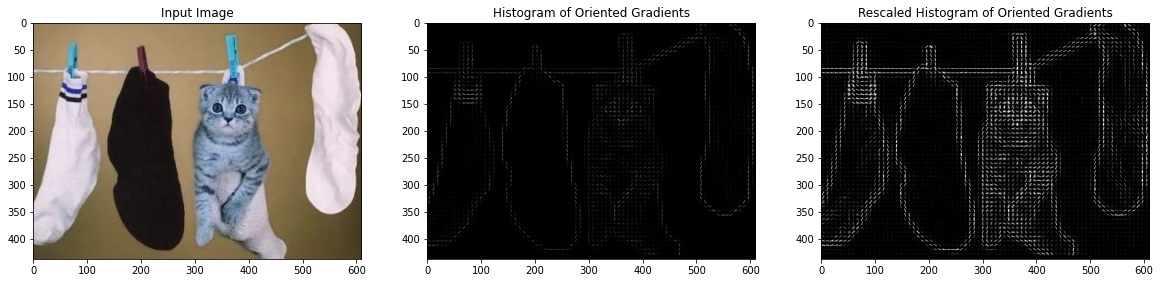

In [41]:
# Collect filename of all tile images
path =  "./dataset/Animals/Cats/*"
all_files = glob.glob(path)
print(len(all_files))

# Create Image Feature
# Bluring image to reduce noise
images = []
for path in all_files:
    image = cv2.imread(path)      #     30            30
    # image = cv2.resize(tile,dsize=(tile_size[0], tile_size[1]), interpolation=cv2.INTER_AREA)
    images.append(image)




# ig = cv2.resize(images[0], (128,64)) 
ig = images[0]
blur = cv2.GaussianBlur(ig,(5,5),0) #Gaussian Filtering
# Calculate HoG of image
fd, hog_image = hog(blur, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(ig)
plt.subplot(1, 3 ,2)
plt.title("Histogram of Oriented Gradients")
plt.imshow(hog_image, cmap='gray')
plt.subplot(1, 3 ,3)
plt.title("Rescaled Histogram of Oriented Gradients")
plt.imshow(hog_image_rescaled, cmap='gray')
print(fd)

#### 9.1.2 PREPARE HOG FEATURE OF SUBIMAGES

In [53]:
#Define block size for subimage
print(ig.shape)
Block_size = (40, 20) # ลองอย่างน้อย 3 ค่า เช่น (40,20), (40, 30), (60, 20), (60,30), (60,40)
# Define stride
# (ระยะขยับ pixel เพื่อท า sliding window เพื่อค านวณ HoG)
Stride = (10, 10)

# Define Sliding window position of row, column (Top left position)
posRow = np.arange(0, ig.shape[0] - Block_size[0]+1, Stride[0])
posCol = np.arange(0, ig.shape[1] - Block_size[1]+1, Stride[1])
# print(ig.shape[1] - Block_size[1]+1, len(posCol))

hogfeatures = []
print(posRow)
# Create subimage feature
# Calculate HoG of each subimage in Sliding window
for i in range(len(posRow)):
  for j in range(len(posCol)):
    startH = posRow[ i ]
    endH = posRow[i] + Block_size[0]
    # print(j, len(posCol))
    startW = posCol[ j ]
    endW = posCol[j] + Block_size[1]
    subImg = ig[ startH:endH , startW:endW ,:]
    blur = cv2.GaussianBlur(subImg,(5,5),0) #Gaussian Filtering
    fd, hog_image = hog(blur, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True, multichannel=True)

    hogfeatures.append(fd)

(438, 610, 3)
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350
 360 370 380 390]


/Users/thana/Workspace/Class/Class_Image_Processing/env/lib/python3.8/site-packages/skimage/_shared/utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)


In [54]:
hogfeatures

[array([0.36718569, 0.        , 0.23363465, ..., 0.09899534, 0.        ,
        0.        ]),
 array([0.42478282, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.40567192, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.        , 0.        , 0.26654824, ..., 0.        , 0.        ,
        0.        ]),
 array([0.34043345, 0.        , 0.34043345, ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.        , 0.        , ..., 0.18347353, 0.17948756,
        0.        ]),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.29587088]),
 array([0.35915248, 0.        , 0.20770326, ..., 0.08995512, 0.        ,
        0.        ]),
 array([0.37196351, 0.        , 0.37196351, ..., 0.        , 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.4472136 , 0.        , 0.4472136 , ..., 0.35334363, 0.    

K-MEAN CLUSTERING

In [55]:
# Clean feature if NA
# fillna(0)
# np.nan_to_num(hogfeatures,nan=0)
# print((hogfeatures))
# # K-mean Clustering
N = 2
kmeans = KMeans(n_clusters=N, random_state=0)
clusters = kmeans.fit_predict(hogfeatures)

In [56]:
clusters

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

In [57]:
cluster_array = clusters.reshape(len(posRow),len(posCol))
print(cluster_array)

[[1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 1 0 0]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]]


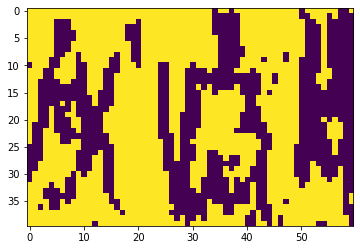

In [58]:
plt.imshow(cluster_array)

9.3.1 K-MEAN CLUSTERING

In [59]:
# ReAssign Label in case of multiple ROIs with the same clusterID
all_labels = label(cluster_array)
# Define bounding box parameter
Color = (255,0,0)
Thickness = 1
print(all_labels)

[[1 1 1 ... 0 0 5]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 3 0 0]
 [1 1 1 ... 3 3 0]
 [1 1 1 ... 3 3 0]]


[ 0  1  2  3  4  5  6  7  8  9 10 11]


12

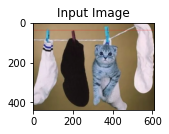

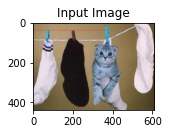

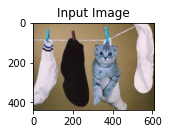

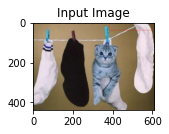

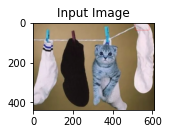

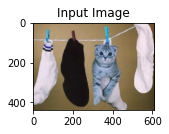

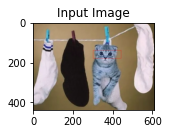

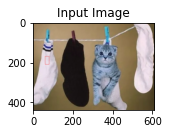

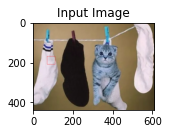

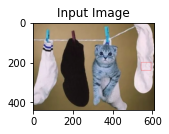

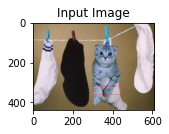

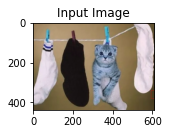

In [60]:
nClass = np.unique(all_labels)
print(nClass)

rois = []
for i in nClass:
    tmp = ig.copy()
    objPos = np.argwhere(all_labels == i)
    # print(objPos)
    startBlockH = objPos[:,0].min()
    endBlockH = objPos[:,0].max()
    startBlockW = objPos[:,1].min()
    endBlockW = objPos[:,1].max()
    startF = (posCol[startBlockW],posRow[startBlockH])
    endF = (posCol[endBlockW] + Block_size[1],posRow[startBlockH] + Block_size[0])
    rois.append(cv2.rectangle(tmp,startF,endF,Color,Thickness))
    plt.figure(figsize=(10,10))
    plt.subplot(4, 4, i+1)
    plt.title("Input Image")
    plt.imshow(rois[i])
    # break
len(rois)

4 4 1
4 4 2
4 4 3
4 4 4
4 4 5
4 4 6
4 4 7
4 4 8
4 4 9
4 4 10
4 4 11
4 4 12


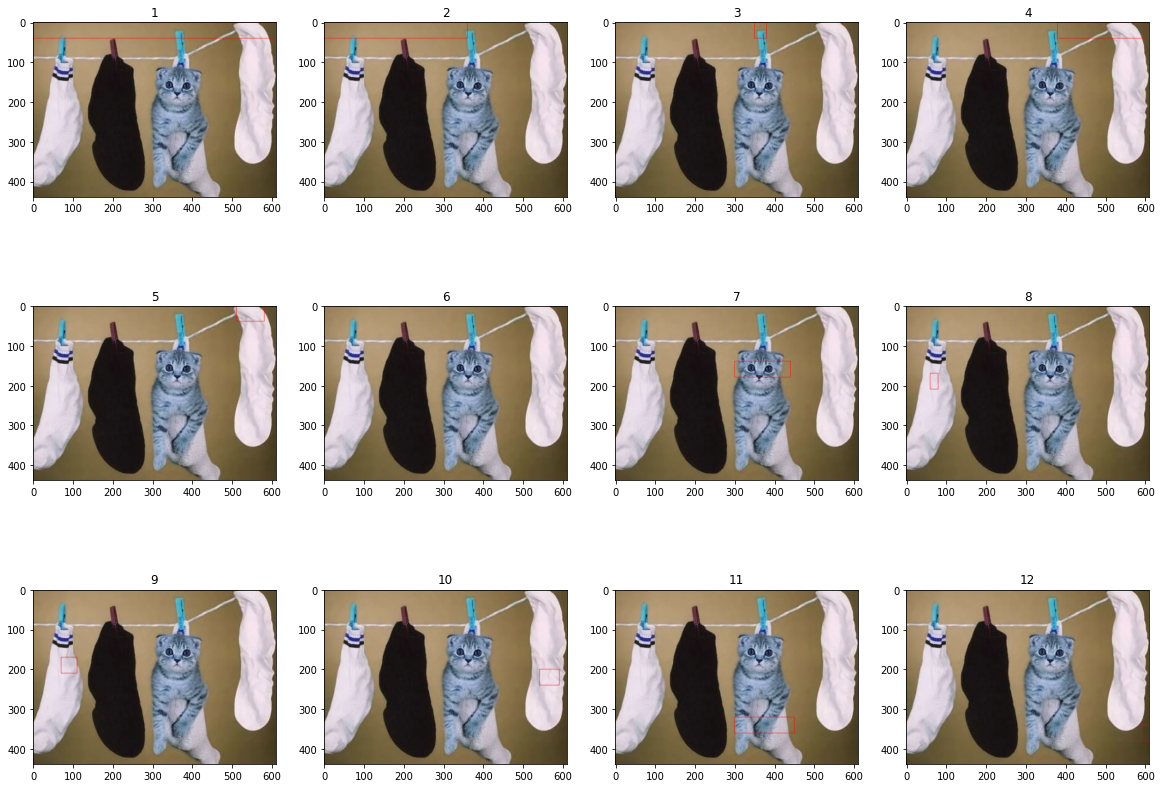

In [61]:
plt.figure(figsize=(20,20))
for r in range(len(rois)):
  print(int(len(rois)/4)+1, int(len(rois)/4)+1, r+1)
  plt.subplot(int(len(rois)/4)+1, int(len(rois)/4)+1, r+1)
  plt.title(r+1)
  plt.imshow(rois[r])